In [49]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [50]:
rawdf = pd.read_csv('/content/drive/MyDrive/DATA /Adidas US Sales Datasets.csv')

In [51]:
rawdf.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store
5,Foot Locker,1185732,06-01-2020,Northeast,New York,New York,Women's Apparel,$50.00,"1,000","$5,00,000","$1,25,000",25%,In-store
6,Foot Locker,1185732,07-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,250","$6,25,000","$3,12,500",50%,In-store
7,Foot Locker,1185732,08-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,900,"$4,50,000","$1,35,000",30%,Outlet
8,Foot Locker,1185732,21-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,950,"$3,80,000","$1,33,000",35%,Outlet
9,Foot Locker,1185732,22-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,825,"$3,71,250","$1,29,938",35%,Outlet


In [52]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [53]:
# convert to date
rawdf['Invoice Date'] = pd.to_datetime(rawdf['Invoice Date'], dayfirst = True)
 # verify datatype
type(rawdf['Invoice Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [54]:
''' filter raw data to have only data for 2021'''
df21 = rawdf.loc[(rawdf['Invoice Date'] >= '01-01-2021') & (rawdf['Invoice Date'] < '01-01-2022'), :]
df21 = df21.reset_index()
df21.drop(['index'], axis= 1, inplace=True)
df21.head(-10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,West Gear,1128299,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,$65.00,750,"$4,87,500","$1,21,875",25%,Outlet
1,West Gear,1128299,2021-01-02,West,California,San Francisco,Women's Street Footwear,$65.00,750,"$4,87,500","$1,95,000",40%,Outlet
2,West Gear,1128299,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,$60.00,650,"$3,90,000","$1,36,500",35%,Outlet
3,West Gear,1128299,2021-01-04,West,California,San Francisco,Men's Apparel,$65.00,550,"$3,57,500","$1,96,625",55%,Outlet
4,West Gear,1128299,2021-01-05,West,California,San Francisco,Women's Apparel,$80.00,725,"$5,80,000","$1,16,000",20%,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Street Footwear,$49.00,200,"$9,800","$4,606",47%,Outlet
8332,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$49.00,128,"$6,272","$2,634",42%,Outlet
8333,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Women's Street Footwear,$47.00,128,"$6,016","$2,166",36%,Outlet
8334,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,$49.00,116,"$5,684","$1,989",35%,Outlet


In [55]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8346 entries, 0 to 8345
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          8346 non-null   object        
 1   Retailer ID       8346 non-null   int64         
 2   Invoice Date      8346 non-null   datetime64[ns]
 3   Region            8346 non-null   object        
 4   State             8346 non-null   object        
 5   City              8346 non-null   object        
 6   Product           8346 non-null   object        
 7   Price per Unit    8346 non-null   object        
 8   Units Sold        8346 non-null   object        
 9   Total Sales       8346 non-null   object        
 10  Operating Profit  8346 non-null   object        
 11  Operating Margin  8346 non-null   object        
 12  Sales Method      8346 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 847.8+ KB


In [56]:
# replace values only in selected columns
df21[['Price per Unit','Total Sales','Operating Profit']] = df21[['Price per Unit','Total Sales','Operating Profit']].replace('[\$,]', '', regex=True).astype(float)
df21.info()
df21.head(-10)

# replace values in all columns
#df = df.replace('[\$,]', '', regex=True).astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8346 entries, 0 to 8345
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          8346 non-null   object        
 1   Retailer ID       8346 non-null   int64         
 2   Invoice Date      8346 non-null   datetime64[ns]
 3   Region            8346 non-null   object        
 4   State             8346 non-null   object        
 5   City              8346 non-null   object        
 6   Product           8346 non-null   object        
 7   Price per Unit    8346 non-null   float64       
 8   Units Sold        8346 non-null   object        
 9   Total Sales       8346 non-null   float64       
 10  Operating Profit  8346 non-null   float64       
 11  Operating Margin  8346 non-null   object        
 12  Sales Method      8346 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 847.8+ KB


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,West Gear,1128299,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,65.0,750,487500.0,121875.0,25%,Outlet
1,West Gear,1128299,2021-01-02,West,California,San Francisco,Women's Street Footwear,65.0,750,487500.0,195000.0,40%,Outlet
2,West Gear,1128299,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,60.0,650,390000.0,136500.0,35%,Outlet
3,West Gear,1128299,2021-01-04,West,California,San Francisco,Men's Apparel,65.0,550,357500.0,196625.0,55%,Outlet
4,West Gear,1128299,2021-01-05,West,California,San Francisco,Women's Apparel,80.0,725,580000.0,116000.0,20%,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Street Footwear,49.0,200,9800.0,4606.0,47%,Outlet
8332,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,49.0,128,6272.0,2634.0,42%,Outlet
8333,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Women's Street Footwear,47.0,128,6016.0,2166.0,36%,Outlet
8334,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,49.0,116,5684.0,1989.0,35%,Outlet


In [57]:
#changed units sold to integer
df21[['Units Sold']] = df21[['Units Sold']].replace('[\$,]', '', regex=True).astype(int)
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8346 entries, 0 to 8345
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          8346 non-null   object        
 1   Retailer ID       8346 non-null   int64         
 2   Invoice Date      8346 non-null   datetime64[ns]
 3   Region            8346 non-null   object        
 4   State             8346 non-null   object        
 5   City              8346 non-null   object        
 6   Product           8346 non-null   object        
 7   Price per Unit    8346 non-null   float64       
 8   Units Sold        8346 non-null   int64         
 9   Total Sales       8346 non-null   float64       
 10  Operating Profit  8346 non-null   float64       
 11  Operating Margin  8346 non-null   object        
 12  Sales Method      8346 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 847.8+ KB


In [58]:
df21['Operating Margin'] = df21['Operating Margin'].str.rstrip('%').astype('float') / 100.0
#                                                    ^ use str funcs to elim '%'     ^ divide by 100
# could also be:     .str[:-1].astype(.... but in case there is no % at the back it will remove the last xter, so we'll avoid this method here.

df21.head(-10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,West Gear,1128299,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,65.0,750,487500.0,121875.0,0.25,Outlet
1,West Gear,1128299,2021-01-02,West,California,San Francisco,Women's Street Footwear,65.0,750,487500.0,195000.0,0.40,Outlet
2,West Gear,1128299,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,60.0,650,390000.0,136500.0,0.35,Outlet
3,West Gear,1128299,2021-01-04,West,California,San Francisco,Men's Apparel,65.0,550,357500.0,196625.0,0.55,Outlet
4,West Gear,1128299,2021-01-05,West,California,San Francisco,Women's Apparel,80.0,725,580000.0,116000.0,0.20,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Street Footwear,49.0,200,9800.0,4606.0,0.47,Outlet
8332,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,49.0,128,6272.0,2634.0,0.42,Outlet
8333,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Women's Street Footwear,47.0,128,6016.0,2166.0,0.36,Outlet
8334,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,49.0,116,5684.0,1989.0,0.35,Outlet


In [59]:
df21.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,8.346000e+03,8346,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000
mean,1.175691e+06,2021-06-30 09:54:33.903666176,44.372154,241.614186,86007.842080,32202.182123,0.425996
min,1.128299e+06,2021-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-04-04 00:00:00,35.000000,101.000000,3904.500000,1775.000000,0.350000
50%,1.185732e+06,2021-07-02 00:00:00,45.000000,173.000000,8620.000000,4019.000000,0.410000
75%,1.185732e+06,2021-09-30 00:00:00,54.000000,325.000000,136875.000000,48125.000000,0.500000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1150.000000,825000.000000,371250.000000,0.800000
std,2.512834e+04,NaN,14.631328,198.512997,131330.187492,50863.768162,0.094454


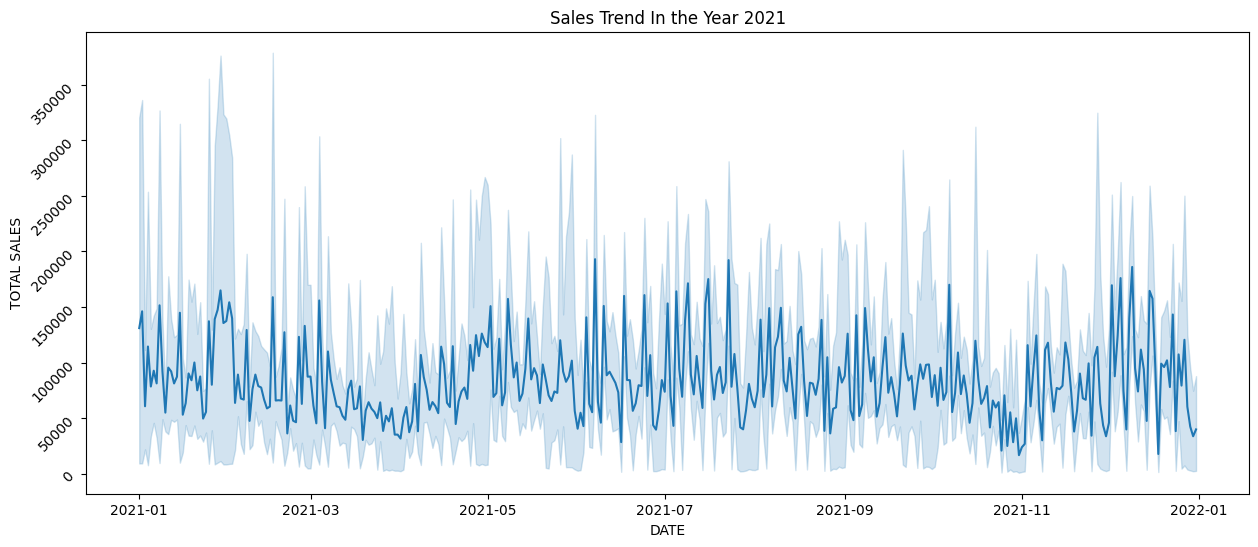

In [60]:
salestrend = df21.sort_values(by='Invoice Date', inplace= False)
plt.figure(figsize=(15, 6))
sb.lineplot(data=salestrend, x='Invoice Date', y='Total Sales')

plt.title('Sales Trend In the Year 2021')
plt.xlabel('DATE')
plt.ylabel('TOTAL SALES')
plt.yticks(rotation=45)
#plt.tight_layout()
plt.show()

In [61]:
''' OVERVIEW OF SALES PERFORMANCE IN YEAR 2021 '''
# Sort the DataFrame by 'ORDERDATE' in ascending order
salestrend = df21.sort_values(by='Invoice Date', inplace= False)
stplot = salestrend.groupby(salestrend['Invoice Date'].dt.month)['Total Sales'].sum()
stplot= stplot.reset_index(name = 'Total Sales')

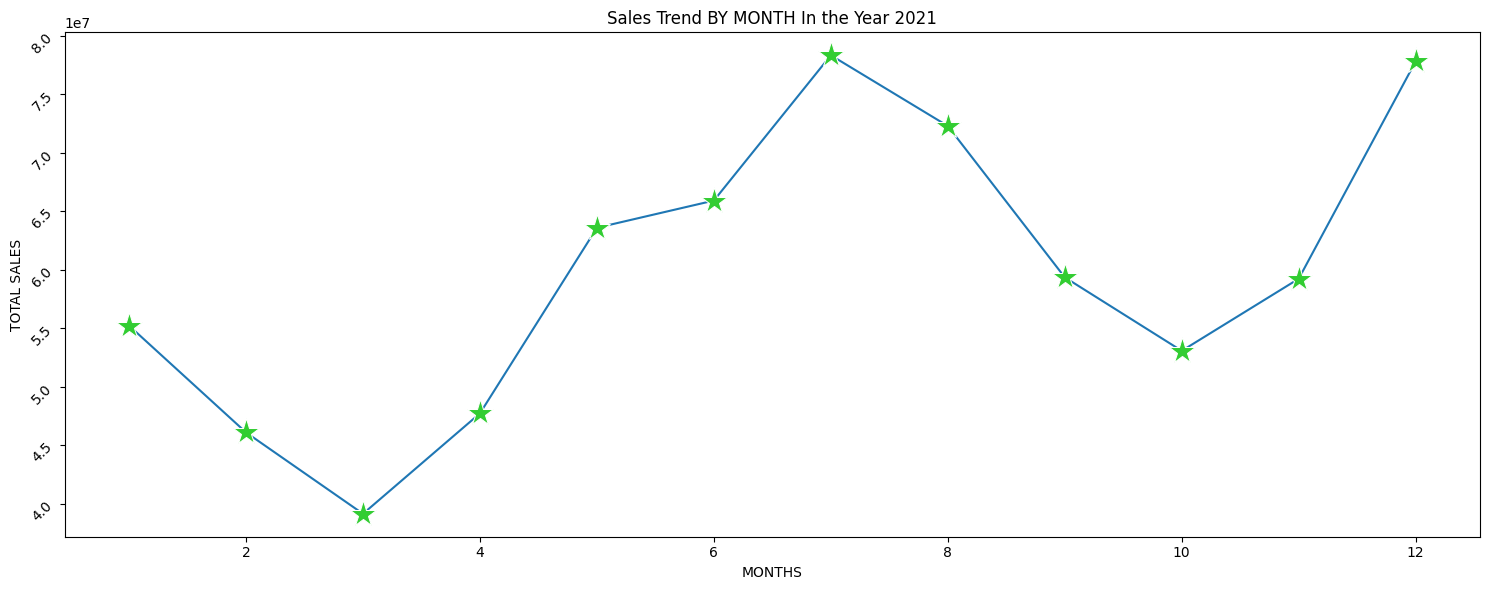

In [62]:
''' OVERVIEW OF SALES PERFORMANCE IN YEAR 2021 '''
# Sort the DataFrame by 'ORDERDATE' in ascending order
plt.figure(figsize=(15, 6))
sb.lineplot(data=stplot, x='Invoice Date', y='Total Sales', marker = '*', markerfacecolor='limegreen', markersize=20)
plt.title('Sales Trend BY MONTH In the Year 2021')
plt.xlabel('MONTHS')
plt.ylabel('TOTAL SALES')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

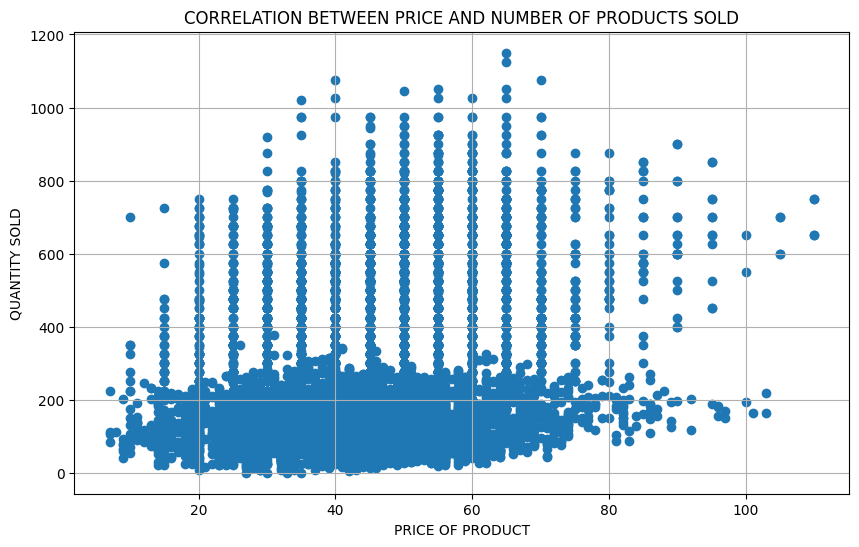

In [63]:
#volume sales vs price
plt.figure(figsize=(10, 6))
plt.scatter(salestrend['Price per Unit'], salestrend['Units Sold'])
plt.xlabel('PRICE OF PRODUCT')
plt.ylabel('QUANTITY SOLD')
plt.title('CORRELATION BETWEEN PRICE AND NUMBER OF PRODUCTS SOLD')
plt.grid(True)
plt.show()

<ipython-input-64-71aa7b9f8371>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x="Retailer", y="Operating Margin", hue="Product", palette="Set1", ci=None,data=overview)


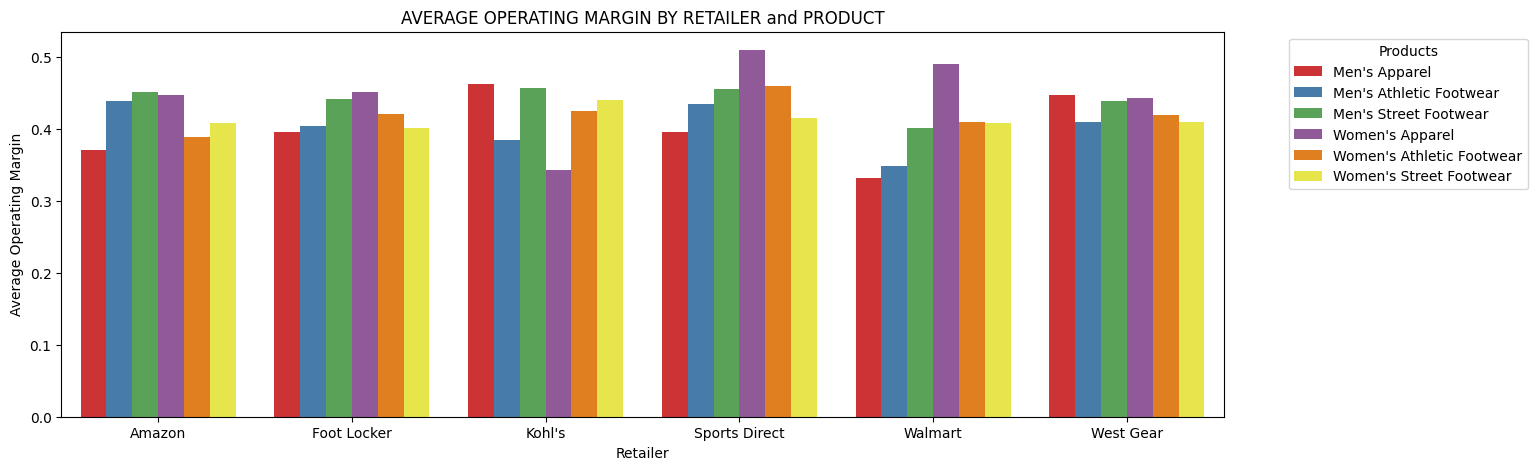

In [64]:
#unit sold  by product and region
overview = salestrend.groupby(['Retailer','Product']).agg({'Operating Margin':'mean', 'Units Sold':'mean'})
overview

plt.figure(figsize=(15, 5))
sb.barplot(x="Retailer", y="Operating Margin", hue="Product", palette="Set1", ci=None,data=overview)
plt.xlabel("Retailer")
plt.ylabel("Average Operating Margin")
plt.title("AVERAGE OPERATING MARGIN BY RETAILER and PRODUCT")
plt.legend(title='Products', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

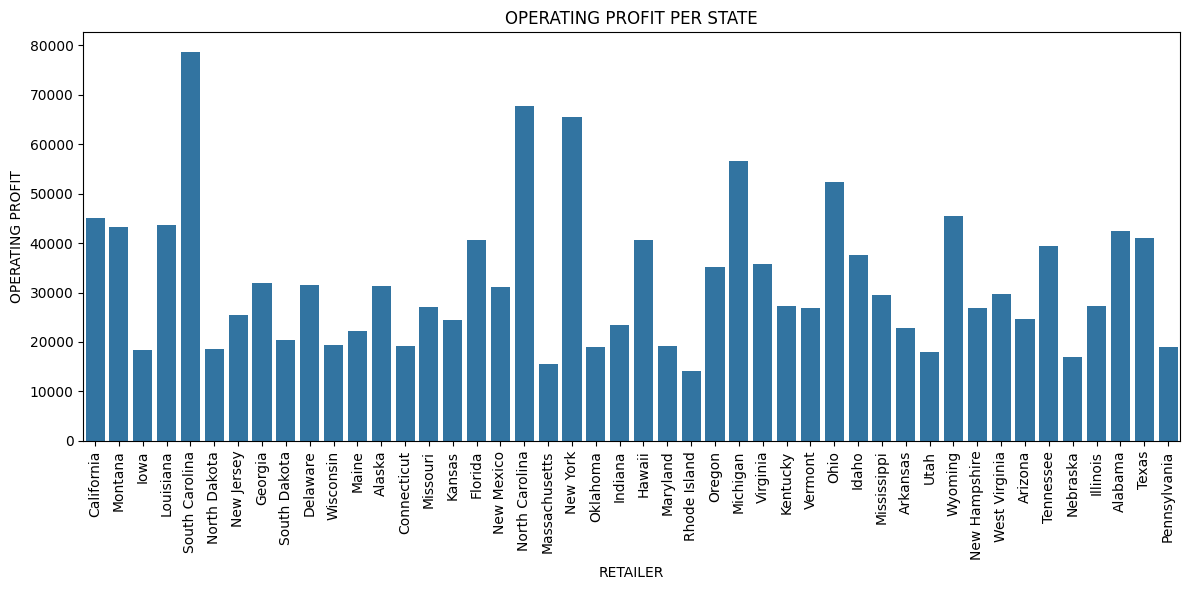

In [65]:
#OPERATING PROFIT BY STATE

plt.figure(figsize=(12, 6))
sb.barplot(x='State', y='Operating Profit', data=salestrend, errorbar= None)
plt.title('OPERATING PROFIT PER STATE')
plt.xlabel('RETAILER')
plt.ylabel('OPERATING PROFIT')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

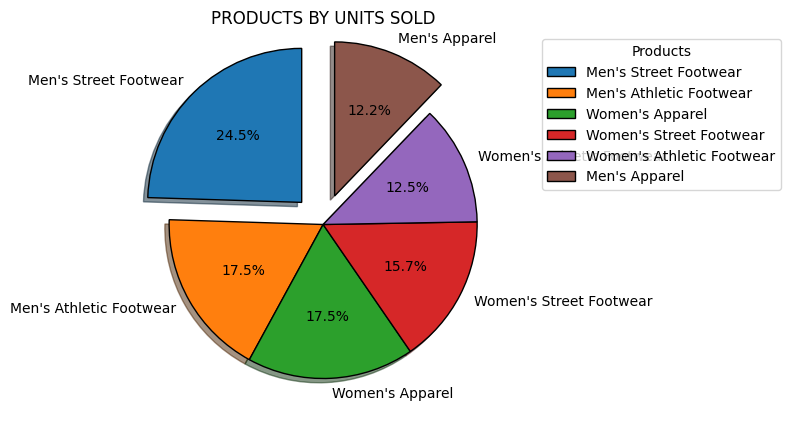

In [66]:
#BarPlot product by units sold
Unitbar = salestrend.groupby(['Product'])['Units Sold'].sum()
Unitbar= Unitbar.reset_index(name = 'Total Units Sold')
Unitbar = Unitbar.sort_values(by = 'Total Units Sold', ascending = False)

fig = plt.figure(figsize=(8, 5))
myexplode = [0.2, 0, 0, 0,0,0.2] # Each value represents how far from the center each wedge is displayed:
plt.pie(Unitbar['Total Units Sold'], labels =Unitbar['Product'] ,autopct='%1.1f%%',explode = myexplode, shadow = True, startangle = 90,
        wedgeprops= {"edgecolor":"black",
                     'linewidth': 1,
                     'antialiased': True})
plt.title('PRODUCTS BY UNITS SOLD')
plt.legend(title='Products', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

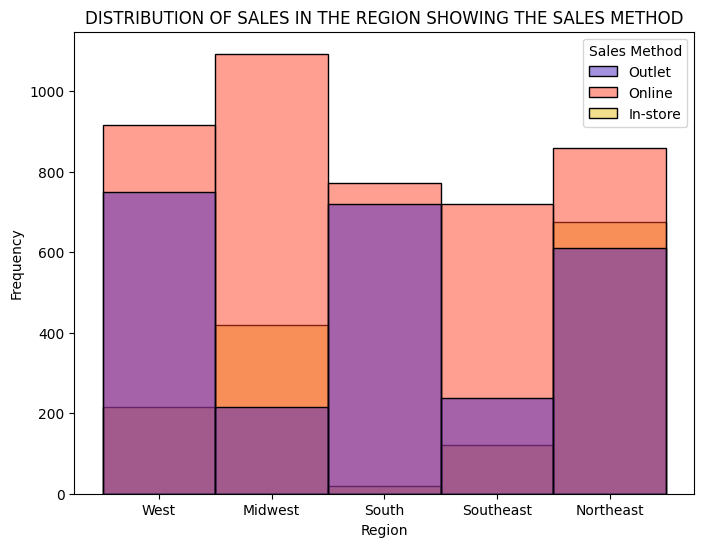

In [67]:
plt.figure(figsize=(8, 6))
sb.histplot(data=salestrend, x='Region', hue='Sales Method', palette='CMRmap')
plt.title('DISTRIBUTION OF SALES IN THE REGION SHOWING THE SALES METHOD')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()